/Users/massimilianodatres/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


6915


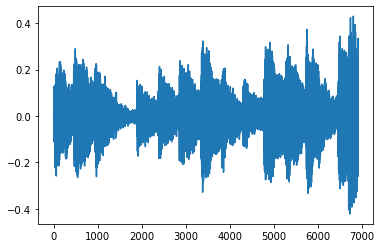

In [1]:
import librosa
import numpy as np
import cmath as math
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
import IPython.display as d
import cvxpy as cvx

x, sr = librosa.load('/Users/massimilianodatres/Desktop/audiorec/FourierCS/sinph9.mp3', sr= 800)
n = len(x)
print(n)
plt.plot(x)

In [2]:
d.Audio(data=x, rate=800, autoplay=True)

/Users/massimilianodatres/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


98


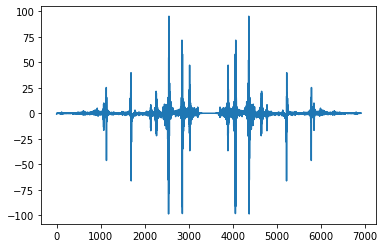

In [3]:
lamda=0
y = fft(x)
plt.plot(y)
lamda =(y > 10).sum()
print(lamda)

In [4]:
def DFT_matrix(N):
    i, j = np.meshgrid(np.arange(N), np.arange(N))
    omega = np.exp( - 2 * math.pi * 1J / N )
    W = np.power( omega, i * j ) / math.sqrt(N)
    return W

In [5]:
F = DFT_matrix(n)

In [6]:
m = lamda*math.log(n)
m = int(m)
m=m*4
print(m)

3464


/Users/massimilianodatres/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [7]:
Omega = np.arange(n)
indexes = np.random.binomial(1, m/n, n)
indexes = np.multiply(Omega, indexes)
indexes = [i for i in indexes if i != 0]
print(len(indexes))

3364


In [8]:
A = F[indexes,:]
print(A.shape)

(3364, 6915)


In [9]:
A = np.array(A)
A = (1/math.sqrt(m))*A

In [10]:
b = A.dot(y)
print(b)

[ 4.65700684e-10+1.17425533e-15j  4.71859640e-01-1.46743376e-15j
 -3.05765633e-01-3.52878669e-15j ...  9.45238569e-02-1.18748558e-13j
 -8.92837622e-03+9.17376326e-13j -9.51822313e-03+1.46850880e-12j]


/Users/massimilianodatres/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


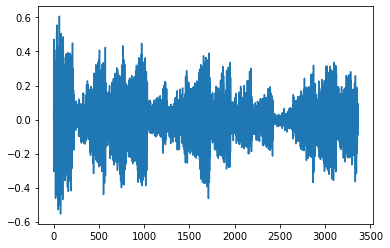

In [11]:
plt.plot(b)
expeir = ifft(b)

In [12]:
d.Audio(data=b, rate=800, autoplay=True)

/Users/massimilianodatres/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/IPython/lib/display.py:157: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [ ]:
signal = cvx.Variable(n, complex=True)
objective = cvx.Minimize(cvx.norm(signal, 1))
constraints = [A*signal == b]
prob = cvx.Problem(objective, constraints)
result = prob.solve(verbose=True)

                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Sep 25 09:53:34 AM: Your problem has 6915 variables, 1 constraints, and 0 parameters.
(CVXPY) Sep 25 09:53:34 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Sep 25 09:53:34 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Sep 25 09:53:34 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.


/Users/massimilianodatres/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/cvxpy/expressions/expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Sep 25 09:53:34 AM: Compiling problem (target solver=ECOS).
(CVXPY) Sep 25 09:53:34 AM: Reduction chain: Complex2Real -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Sep 25 09:53:34 AM: Applying reduction Complex2Real
(CVXPY) Sep 25 09:53:35 AM: Applying reduction Dcp2Cone
(CVXPY) Sep 25 09:53:35 AM: Applying reduction CvxAttr2Constr
(CVXPY) Sep 25 09:53:35 AM: Applying reduction ConeMatrixStuffing


In [ ]:
import csv

with open('FourierRec_sign.txt', 'w') as f:
    # create the csv writer
    writer = csv.writer(f)
    
    for s in signal: 
        # write a row to the csv file
        writer.writerow(s)

In [ ]:
delta = 1e-6
signal= signal.value
r = (np.absolute(signal) > delta)
signal[np.absolute(signal) < delta] = 0
plt.plot(signal)

In [ ]:
plt.plot(y[0:200])

In [ ]:
plt.plot(signal[0:200])

In [ ]:
delta = 0.5
signal[np.absolute(signal) < delta] = 0
sign = ifft(signal)
plt.plot(sign)

In [ ]:
d.Audio(data=sign, rate=800, autoplay=True)